In [1]:
library(statsr)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [3]:
data(nc)

In [12]:
?nc

In [5]:
str(nc)

Classes 'tbl_df', 'tbl' and 'data.frame':	1000 obs. of  13 variables:
 $ fage          : int  NA NA 19 21 NA NA 18 17 NA 20 ...
 $ mage          : int  13 14 15 15 15 15 15 15 16 16 ...
 $ mature        : Factor w/ 2 levels "mature mom","younger mom": 2 2 2 2 2 2 2 2 2 2 ...
 $ weeks         : int  39 42 37 41 39 38 37 35 38 37 ...
 $ premie        : Factor w/ 2 levels "full term","premie": 1 1 1 1 1 1 1 2 1 1 ...
 $ visits        : int  10 15 11 6 9 19 12 5 9 13 ...
 $ marital       : Factor w/ 2 levels "married","not married": 1 1 1 1 1 1 1 1 1 1 ...
 $ gained        : int  38 20 38 34 27 22 76 15 NA 52 ...
 $ weight        : num  7.63 7.88 6.63 8 6.38 5.38 8.44 4.69 8.81 6.94 ...
 $ lowbirthweight: Factor w/ 2 levels "low","not low": 2 2 2 2 2 1 2 1 2 2 ...
 $ gender        : Factor w/ 2 levels "female","male": 2 2 1 2 1 2 2 2 2 1 ...
 $ habit         : Factor w/ 2 levels "nonsmoker","smoker": 1 1 1 1 1 1 1 1 1 1 ...
 $ whitemom      : Factor w/ 2 levels "not white","white": 1 1 2 2

In [6]:
summary(nc$gained)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   20.00   30.00   30.33   38.00   85.00      27 

Warning message:
"Removed 27 rows containing non-finite values (stat_bin)."

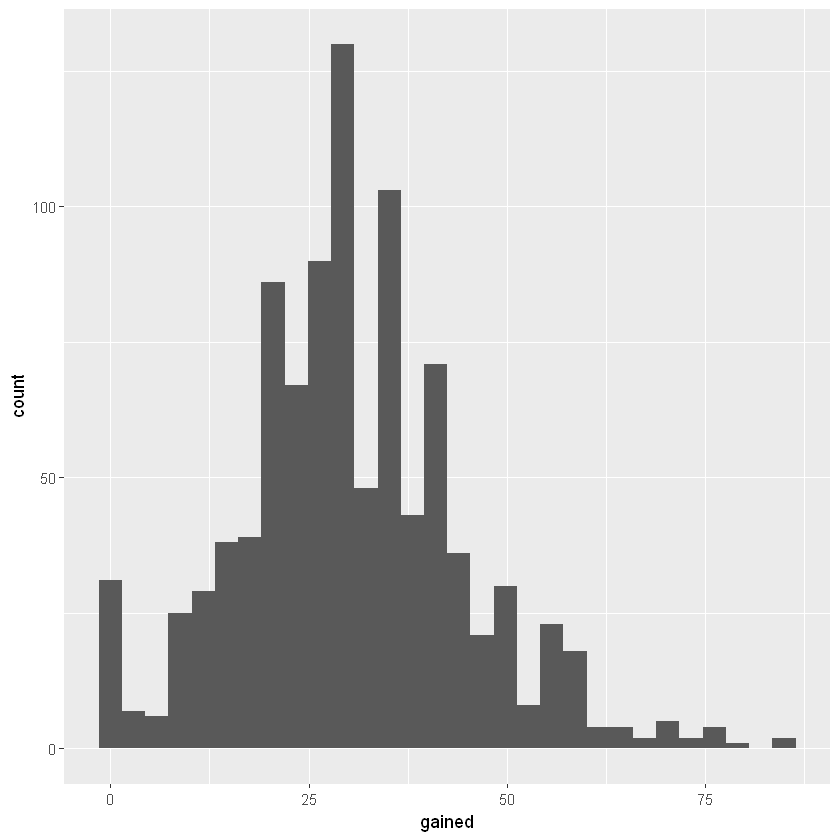

In [7]:
ggplot(nc, aes(gained)) +
geom_histogram(bins = 30)

In [11]:
nc %>%
filter(is.na(gained)) %>%
count()

n
27


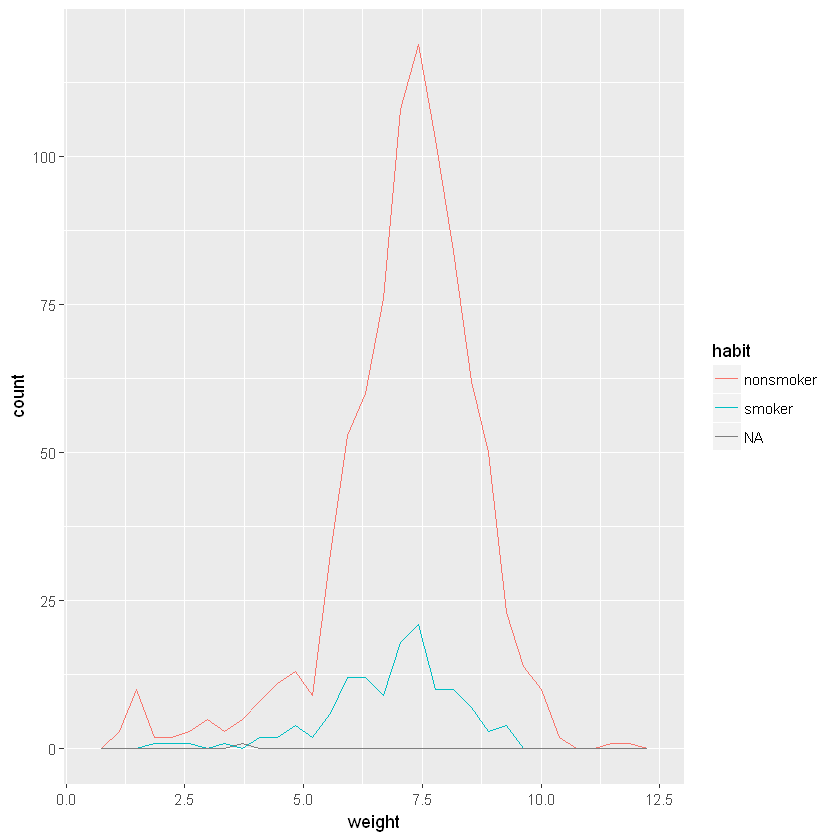

In [18]:
ggplot(nc, aes(weight, color = habit)) +
geom_freqpoly(bins = 30)

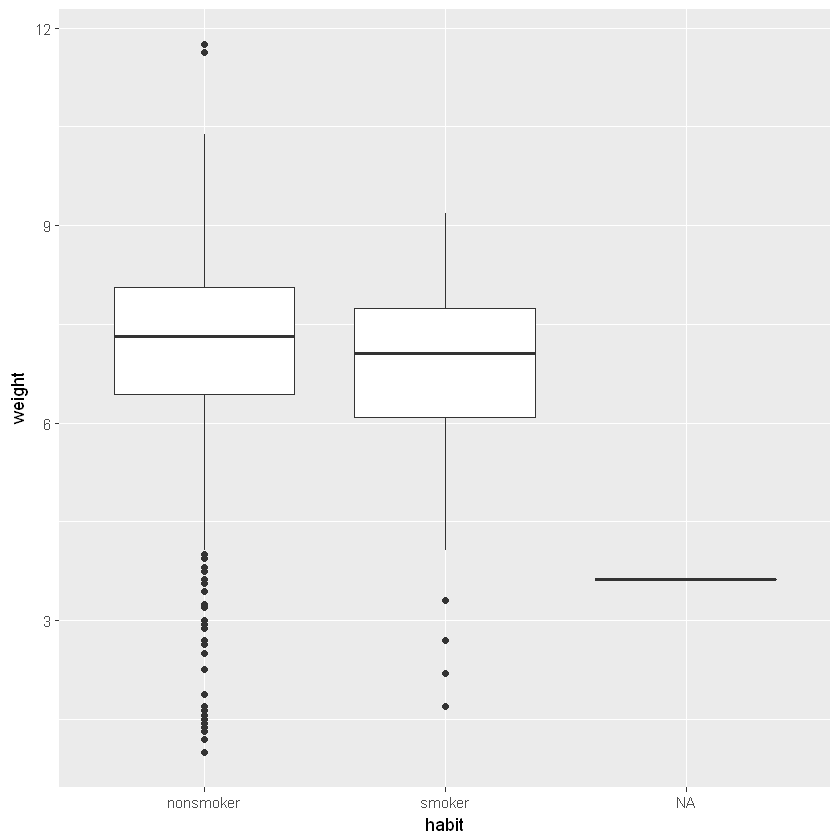

In [13]:
ggplot(nc, aes(habit, weight)) +
geom_boxplot()

In [19]:
nc %>%
group_by(habit) %>%
summarize(mean_weight = mean(weight))

habit,mean_weight
nonsmoker,7.144273
smoker,6.828730
NA,3.630000


In [20]:
nc %>%
group_by(habit) %>%
count()

habit,n
nonsmoker,873
smoker,126
NA,1


In [23]:
?inference

Response variable: numerical
Explanatory variable: categorical (2 levels) 
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
H0: mu_nonsmoker =  mu_smoker
HA: mu_nonsmoker != mu_smoker
t = 2.359, df = 125
p_value = 0.0199

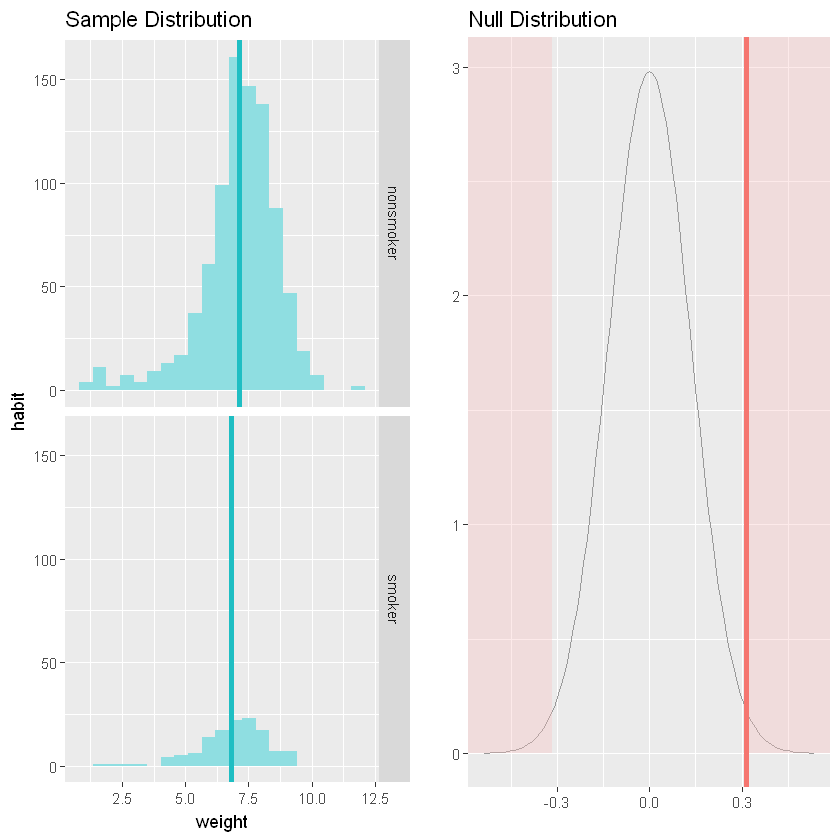

In [22]:
inference(y = weight, x = habit, data = nc, statistic = 'mean', type= 'ht',
         null = 0, alternative = 'twosided', method = 'theoretical')

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
95% CI (nonsmoker - smoker): (0.0508 , 0.5803)


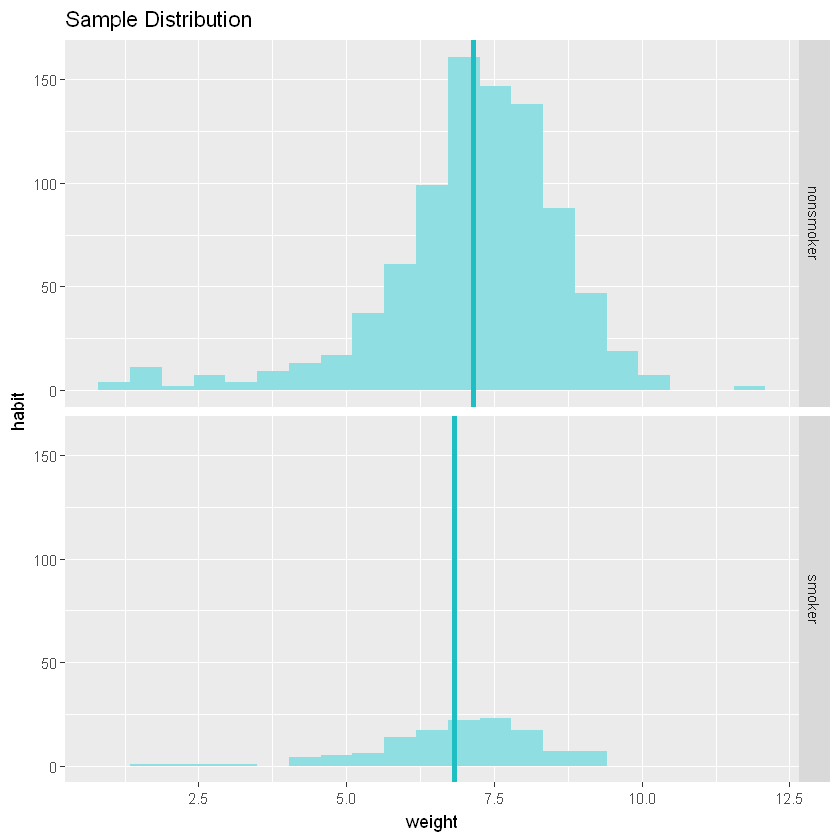

In [27]:
inference(y = weight, x = habit, data = nc, statistic = 'mean', type= 'ci',
         method = 'theoretical', conf_level = 0.95)

In [29]:
summary(nc$weeks)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  20.00   37.00   39.00   38.33   40.00   45.00       2 

Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

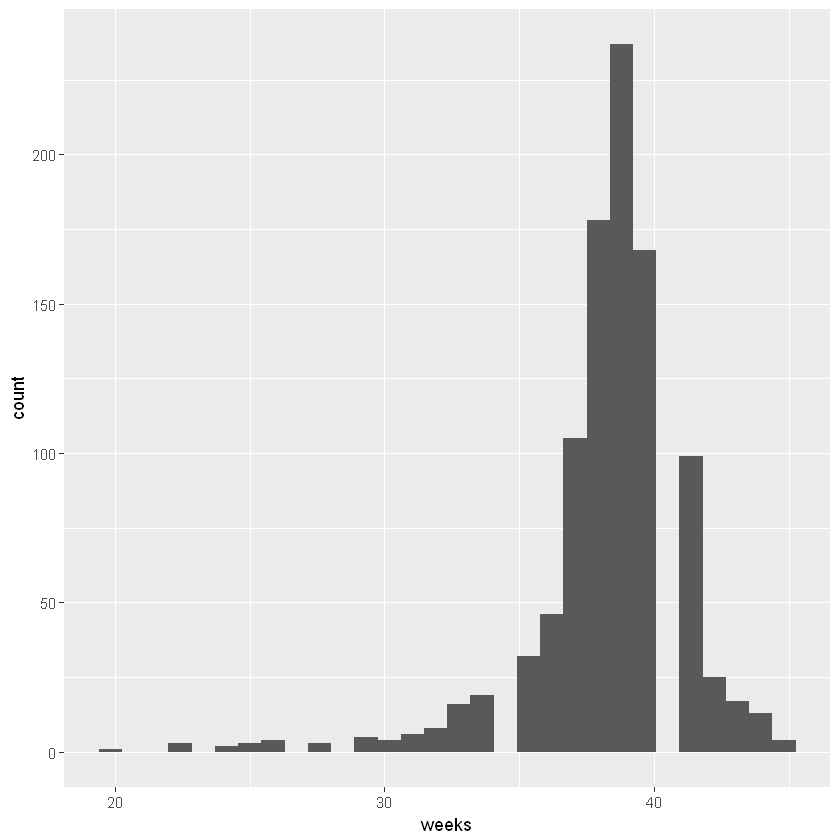

In [28]:
ggplot(nc, aes(weeks)) +
geom_histogram(bins = 30)

Single numerical variable
n = 998, y-bar = 38.3347, s = 2.9316
99% CI: (38.0952 , 38.5742)


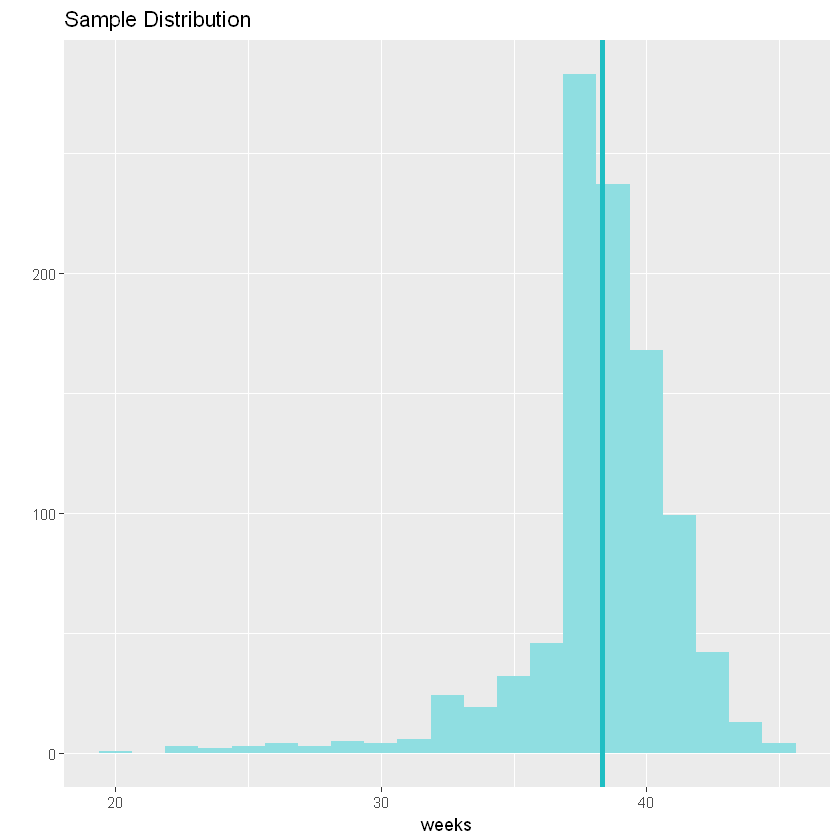

In [30]:
inference(y = weeks, data = nc, statistic = 'mean', type= 'ci',
         method = 'theoretical', conf_level = 0.99)

Single numerical variable
n = 998, y-bar = 38.3347, s = 2.9316
90% CI: (38.1819 , 38.4874)


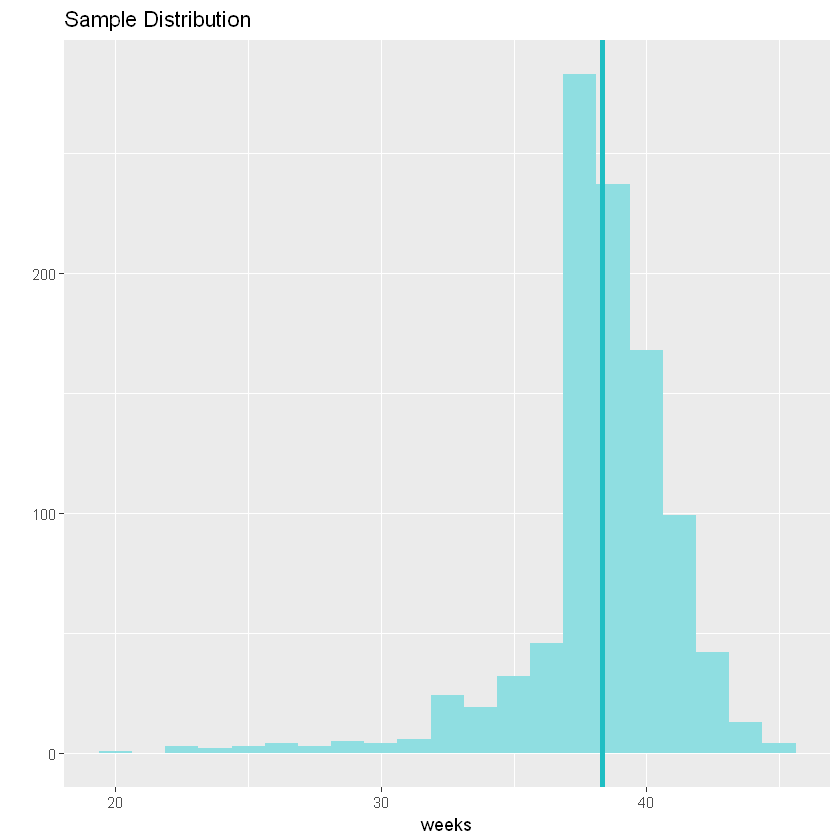

In [31]:
inference(y = weeks, data = nc, statistic = 'mean', type= 'ci',
         method = 'theoretical', conf_level = 0.90)

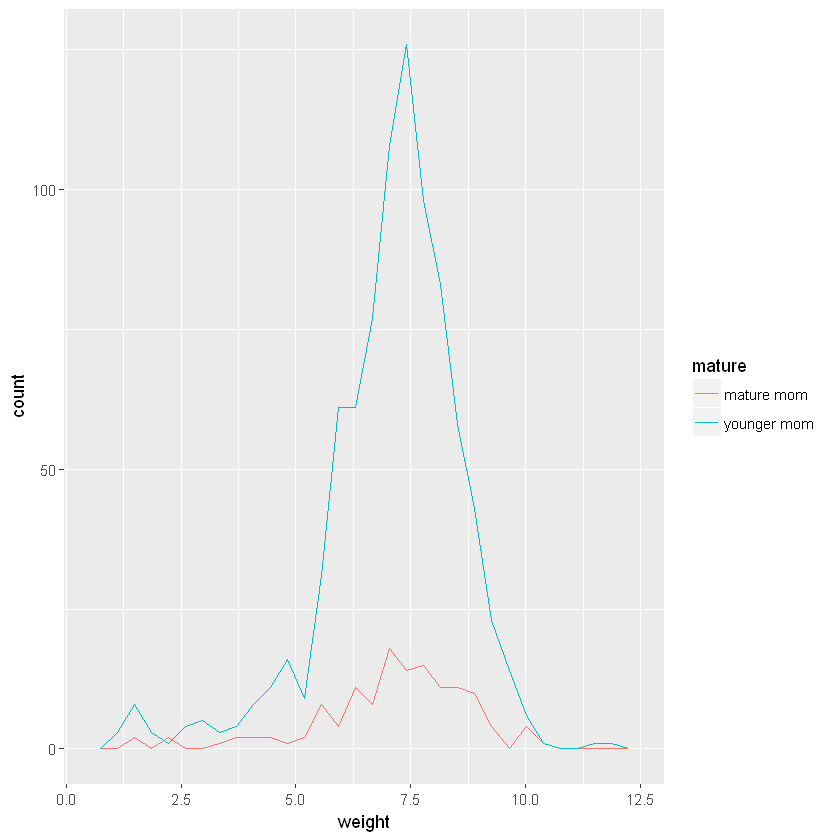

In [36]:
ggplot(nc, aes(weight, color = mature)) +
geom_freqpoly(bins = 30)

In [44]:
nc %>%
group_by(mature) %>%
summarize(mean_weight = mean(weight), sd_weight = sd(weight))

mature,mean_weight,sd_weight
mature mom,7.125564,1.659082
younger mom,7.097232,1.485477


Response variable: numerical
Explanatory variable: categorical (2 levels) 
n_mature mom = 129, y_bar_mature mom = 28.7907, s_mature mom = 13.4824
n_younger mom = 844, y_bar_younger mom = 30.5604, s_younger mom = 14.3469
H0: mu_mature mom =  mu_younger mom
HA: mu_mature mom != mu_younger mom
t = -1.3765, df = 128
p_value = 0.1711

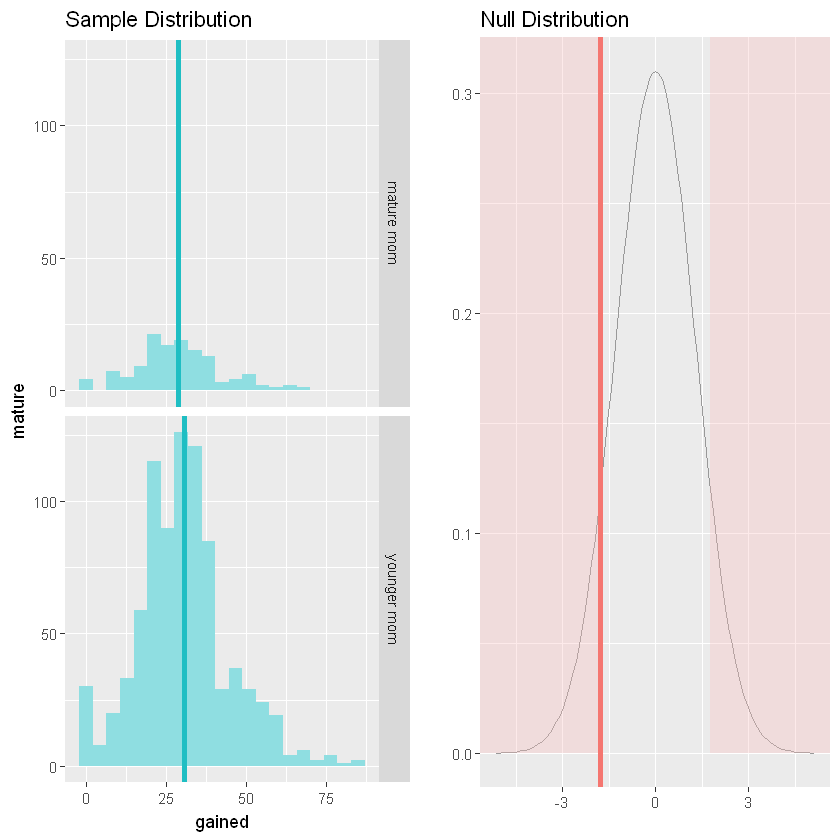

In [47]:
inference(y = gained, x = mature, data = nc, statistic = 'mean', type= 'ht',
         null = 0, alternative = 'twosided', method = 'theoretical')

In [49]:
?nc

In [52]:
nc %>%
group_by(mature) %>%
summarize(min(mage), max(mage))

mature,min(mage),max(mage)
mature mom,35,50
younger mom,13,34
